Action: transcribe (yes, really) the python scripts using the text editor of your choice, and save them to a suitable place on the cluster. As you type them in, make sure that you understand how each unit of code fits in to the whole.

In [5]:
!ssh dsm1 'cat ./bigdata/mapper.py'






		print "%s\t%s" % (word, 1)

In [7]:
!ssh dsm1 'cat ./bigdata/reducer.py'















	print "%s\t%s" % (word, current_count)

Action: test your python transcriptions on the Declaration of Independence, using a pipeline such as:

In [8]:
!ssh dsm1 'cat ./bigdata/1.txt | python ./bigdata/mapper.py | sort -k 1 | python ./bigdata/reducer.py'

00,	1
01,	1
05:	1
===========================================================	2
===========================================	3
===============	1
/	2
.	92
(~),	2
(_)	2
(*)	2
(*	1
[*]	6
***	6
&	2
﻿	1
10,000	3
10000	1
10,000th	1
1000	1
100	2
10.	1
10	1
10th	1
[1]	6
#1.	1
#1]	2
1.	4
1	3
11,	1
113	1
1-2%.	2
1-2%	3
12	1
12:11	1
1240	1
130	1
$1500,	2
1500	1
15,	1
1620.	1
1620	1
1739	1
1774.	1
1775.	1
1775]	1
1776.	1
1776	1
1778.	1
1787	2
1789	1
1791	1
1861	1
1863	1
1865	1
19,	2
1961,	1
1970's***	1
1970's	1
1971--	1
1971,	2
1971.	2
1971**	2
1971	3
1972	1
1973--	1
1973,	1
1974--	1
1974	1
1975,	1
1975	2
1977	1
1978	1
1979	1
1991	1
1993--	3
1993,	2
1993	1
1994	1
1997	1
1998	1
1999	1
1st	1
2000	3
2001,**	1
2001.	2
2001	6
2002,	1
2002	3
2003	1
2004]	1
2004	1
200th	1
20,	1
20%	2
[2]	6
$2	1
#2]	1
2.	4
2	1
21,	1
(212-254-5093)	1
22,	5
23,	2
2500	1
25,	3
2nd	1
3000	1
30	2
30th	3
[3]	4
#3]	1
3.	4
31,	3
38655-4109	1
4000+	1
4000	1
#4]	1
4,	3
4.	3
4%	1
50	2
501(c)(3)	1
#5]	1
5.	1
5	2
6000	1
60	2
#6]	1
6.	1

In [10]:
!ssh dsm1 'chmod +x ./bigdata/mapper.py ./bigdata/reducer.py'

Action: check that the output looks reasonable? 

Answer: The outcome looks fine apart from the fact that punctuations like comma and fullstop are not yet removed from the words. This might cause double counting of the same word. For example, '95,' & '95.' & '95' might have been counted as 3 separate words through the mapper. Also, every word should be in lowercase to avoid double counting of the same word. 'Apparent' and 'apparent' will be counted as 2 different words through the mapper. So, the mapper needs to be modified to take into account for the issues mentioned. A new mapper is shown below to cater for the need to eliminate delimiters and space(i.e. whitespace). However, note that the string shown below also will be removed from the mapper because it contains whitespace characters. This is not much of an issue given that we are only interested in counting just alphabetical words.

===========================================================	

===========================================	

===============

/	

.	

(~),	

(_)	

(*)	

(*	

[*]	


&	


Now, the modified mapper is shown below:

In [42]:
!ssh dsm1 'cat ./bigdata/mapper1.py'
#re.findall(r"[\w']+", line.lower()) removes white-space and turn every word into lowercase






		print "%s\t%s" % (word, 1)

In [41]:
!ssh dsm1 'cat ./bigdata/1.txt | python ./bigdata/mapper1.py | sort -k 1 | python ./bigdata/reducer.py'

000	3
000th	1
00	1
01	1
02	2
04	1
05	1
_	2
10000	1
1000	1
100	2
10	6
10th	1
1	21
11	3
113	1
12	2
1240	1
130	1
1500	3
15	1
1620	2
1739	1
1774	1
1775	2
1776	2
1778	1
1787	2
1789	1
1791	1
1861	1
1863	1
1865	1
19	2
1961	1
1970's	2
1971	10
1972	1
1973	2
1974	2
1975	3
1977	1
1978	1
1979	1
1991	1
1993	6
1994	1
1997	1
1998	1
1999	1
1st	1
2000	3
2001	9
2002	4
2003	1
2004	2
200th	1
20	3
2026	1
2	18
21	1
212	1
22	5
23	2
2500	1
25	3
254	1
29	1
2nd	1
3000	1
30	2
30th	3
3	10
31	3
38655	1
4000	2
4	8
4109	1
50	2
501	1
5093	1
5	4
6000	1
60	2
6	2
622154	1
64	1
7	2
72600	1
8	2
9000	1
90	3
9	2
91	1
92	2
93	2
94	1
95	1
96	1
97	1
98	1
99	1
a	277
abandon	2
abdicated	2
abide	2
abilities	1
ability	2
able	3
abolish	3
abolishing	6
about	16
above	4
abr	1
abridging	1
absence	1
absent	1
absolute	8
absolutely	1
absolved	2
absorbs	1
abuses	2
accept	5
acceptance	2
accepted	1
accepting	1
accepts	2
accessed	1
accession	1
accidental	1
accommodation	2
according	8
accordingly	3
account	1
accumulation	1
accusation	1
accused

Action: What happens if you don’t have the sorting step (“shuffle”) in the pipeline?

Answer: Shuffle and Sort phase is done by framework. Data from all mappers are grouped by the key, split among reducers and sorted by the key. Each reducer obtains all values associated with the same key. Without the sorting step, in the end at the stage of reducer-step given the same reducer is still used, same words will be counted for more than just once, and they will appear anywhere in the results without a desired alphabetical order which is important for users to read or search for keys.
MapReduce was inherently a paper from Google (source) which states that within a given partition, the intermediate key/value pairs are processed in increasing key order. This ordering guarantee makes it easy to generate a sorted output file per partition, which is useful when the output file format needs to support efficient random access lookups by key, or users of the output find it convenient to have the data sorted.


Action: Can you explain the output in terms of the operation of the reducer code?

The reducer code shown in the lecture is shown below:

In [44]:
!ssh dsm1 'cat ./bigdata/reducer.py'















	print "%s\t%s" % (word, current_count)

This code does the following:
First iteration of the for-loop:

From the results from the mapper, every word is shown together with count equals to '1',seperate by a tabspace '/t'. To get this information into a string, (word, count) = line.split('\t', 1) is written. This step : count = int(count), will make the 'count' into interger,  which will be '1' into first iteration, which the same word is encountered more than once, it will increase according to the incremental appearance of the same word in the text. Since the current word is set to None, which tells us no words appear before the first iteration, current_word is now being set to this first new word itself, with the current_count equals to 1 (which is the count).

Second iteration onwards of the for-loop:

If the next word is the same word from the previous iteration of the for-loop, which is the case that 'if word == current_word:', then the count will be added by 1, i.e.  current_count += count

If the next word is not the same word from the previous iteration of the for-loop, which is the case that 'else:', then the previous word information will be printed, i.e. ' if current_word: print "%s\t%s" % (current_word, current_count) '. Then, the current word is reset to this new word with the current count set to count of the new word itself, which will be '1' in this instance.

Finally:
The last word from the mapper phase will enter the last iteration of the for-loop. When it reaches to the last line of [key,value] of the mapper phase, which is if ' if word == current_word: print "%s\t%s" % (word, current_count)'  ', then the resultant count of the word will be printed. 

Results: This gives the count result of every single word of the text given.

In [54]:
!ssh dsm1 'hadoop fs -copyFromLocal 1.txt .'

Action: you can run it as follows:

hadoop jar /usr/local/hadoop-2.6.0/share/hadoop/mapreduce/hadoop-mapreduce-examples-2.6.0.jar \
  wordcount 1.txt output


In [56]:
!ssh dsm1 'hadoop jar /usr/local/hadoop-2.6.0/share/hadoop/mapreduce/hadoop-mapreduce-examples-2.6.0.jar wordcount 1.txt output'

16/02/09 22:02:52 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/09 22:02:53 INFO input.FileInputFormat: Total input paths to process : 1
16/02/09 22:02:53 INFO mapreduce.JobSubmitter: number of splits:1
16/02/09 22:02:53 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1452790691884_0242
16/02/09 22:02:53 INFO impl.YarnClientImpl: Submitted application application_1452790691884_0242
16/02/09 22:02:53 INFO mapreduce.Job: The url to track the job: http://dsm1:8088/proxy/application_1452790691884_0242/
16/02/09 22:02:53 INFO mapreduce.Job: Running job: job_1452790691884_0242
16/02/09 22:02:57 INFO mapreduce.Job: Job job_1452790691884_0242 running in uber mode : false
16/02/09 22:02:57 INFO mapreduce.Job:  map 0% reduce 0%
16/02/09 22:03:07 INFO mapreduce.Job:  map 100% reduce 0%
16/02/09 22:03:12 INFO mapreduce.Job:  map 100% reduce 100%
16/02/09 22:03:13 INFO mapreduce.Job: Job job_1452790691884_0242 completed successfully
16/02/09 22:03:1

In [57]:
!ssh dsm1 'hadoop fs -copyToLocal output/part-r-00000 .'

In [58]:
!ssh dsm1 'hadoop fs -cat output/part-r-00000'

"AS-IS".	2
"Brittain."	2
"Brittish",	1
"Defects".	2
"House"	1
"I	1
"More	1
"No	1
"PROJECT	5
"Project	4
"Project").	2
"Resolved:	1
"Right	2
"Small	11
"TO	1
"The	1
"Woe	1
"before	1
"facsimiles"	4
"facsimiles."	2
"legal	1
"old"	1
"preserve,	1
"public	2
"shall	1
"small	2
"the	1
"undo	1
#1.	1
#1]	2
#2]	1
#3]	1
#4]	1
#5]	1
#6]	1
#7]	1
#8]	1
#9]	1
$1500,	2
$2	1
&	2
&c.	1
(*	1
(*)	2
(212-254-5093)	1
(72600.2026@compuserve.com);	1
(C)	1
(Sundays	1
(Three	1
(_)	2
(and	4
(as	2
(except	1
(free!).	1
(if	4
(not	1
(one	1
(or	7
(such	2
(the	2
(when	1
(~),	2
***	6
******The	1
******This	1
*****The	1
*****These	1
****The	1
***End	1
***START**THE	2
***The	1
**Etexts	1
**The	6
**We	1
**Welcome	2
**eBooks	1
*BEFORE!*	2
*EITHER*:	2
*END	1
*END*THE	1
*These	1
*WANT*	2
*not*	2
--Such	2
--between	1
.	92
.I	1
.North	1
.a	1
.and	8
.ask	3
.at	1
.both	1
.but	1
.by	1
.disease.	1
.for	2
.in	2
.more	1
.not	2
.poverty.	1
.remembering	1
.signifying	1
.testing	1
.that	2
.the	1
.there	2
.those	1
.to	5
.we	1
.where	1
.whe

Action: using either method, check that the output file’s contents are the same as those from running the local word histogram job

Answer: They show different results. It is important to note that upper-cased alphebets are shown first, followed by lower-cased alphabets then numuric characters. Now, alphanumeric characters with joined with white spaces are presented. The 'sort' function in the hadoop built in function is more complicated in this wordcount function, where its 'sort' function is case-sensitive and also 'alphanumerically sensitive', giving the end results (i.e., after the reducer-step) to the users to have a more meaningful read. However, the double-counting problem of the same word because of the existence of delimiters, still persists. For example :
year	3

year's	1

year?	1

years	9

years,	1

years.	3

From the jar-built-in wordcount function, the word year concatenated with different delimiters and also with  's is counted as different entity.



In [71]:
!ssh dsm1 'hadoop fs -rm -r output'

16/02/09 22:33:58 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted output


In [72]:
!ssh dsm1 'hadoop jar /usr/local/hadoop-2.6.0/share/hadoop/tools/lib/hadoop-streaming-2.6.0.jar \
-file mapper.py -file reducer.py -mapper "python mapper.py" -reducer "python reducer.py" -input 1.txt -output output'

16/02/09 22:34:02 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [mapper.py, reducer.py, /tmp/hadoop-unjar2554252951197564515/] [] /tmp/streamjob181810522169803684.jar tmpDir=null
16/02/09 22:34:03 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/09 22:34:03 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/09 22:34:04 INFO mapred.FileInputFormat: Total input paths to process : 1
16/02/09 22:34:04 INFO mapreduce.JobSubmitter: number of splits:2
16/02/09 22:34:04 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1452790691884_0246
16/02/09 22:34:04 INFO impl.YarnClientImpl: Submitted application application_1452790691884_0246
16/02/09 22:34:04 INFO mapreduce.Job: The url to track the job: http://dsm1:8088/proxy/application_1452790691884_0246/
16/02/09 22:34:04 INFO mapreduce.Job: Running job: job_1452790691884_0246
16/02/09 22:34:14 INFO mapreduc

In [76]:
!ssh dsm1 'hadoop fs -cat output/part-00000'

"AS-IS".	2
"Brittain."	2
"Brittish",	1
"Defects".	2
"House"	1
"I	1
"More	1
"No	1
"PROJECT	5
"Project	4
"Project").	2
"Resolved:	1
"Right	2
"Small	11
"TO	1
"The	1
"Woe	1
"before	1
"facsimiles"	4
"facsimiles."	2
"legal	1
"old"	1
"preserve,	1
"public	2
"shall	1
"small	2
"the	1
"undo	1
#1.	1
#1]	2
#2]	1
#3]	1
#4]	1
#5]	1
#6]	1
#7]	1
#8]	1
#9]	1
$1500,	2
$2	1
&	2
&c.	1
(*	1
(*)	2
(212-254-5093)	1
(72600.2026@compuserve.com);	1
(C)	1
(Sundays	1
(Three	1
(_)	2
(and	4
(as	2
(except	1
(free!).	1
(if	4
(not	1
(one	1
(or	7
(such	2
(the	2
(when	1
(~),	2
***	6
******The	1
******This	1
*****The	1
*****These	1
****The	1
***End	1
***START**THE	2
***The	1
**Etexts	1
**The	6
**We	1
**Welcome	2
**eBooks	1
*BEFORE!*	2
*EITHER*:	2
*END	1
*END*THE	1
*These	1
*WANT*	2
*not*	2
--Such	2
--between	1
.	92
.I	1
.North	1
.a	1
.and	8
.ask	3
.at	1
.both	1
.but	1
.by	1
.disease.	1
.for	2
.in	2
.more	1
.not	2
.poverty.	1
.remembering	1
.signifying	1
.testing	1
.that	2
.the	1
.there	2
.those	1
.to	5
.we	1
.where	1
.whe

Action: using either method, check that the output file’s contents are the same as those from running the local word histogram job

Answer: The results are not the same. The above result looks rather like the result retrieved from running the hadoop-built-in-wordcount function. Perhaps the difference is due to the different sort fucntion encoded in hadoop function

Section:Copying the data to HDFS
    
Action: start this copy off. By using hadoop fs -ls, or otherwise, estimate how long the copy will take. Why do you think it is taking so long?

Answer: Because it is mainly made up of a large collection of small files; hadoop works faster with a large files

Action: try running the above script in a shell pipeline on the cluster, for example: cat 1.txt | python himher-mapper.py

and try to explain what happens:

In [7]:
!ssh dsm1 'cat himher-mapper.py'

#! /usr/bin/env python

import sys, os, re

him = 0; her = 0
for line in sys.stdin:
    him += len(re.findall(r'\b(he|him|himself|his)\b', line))
    her += len(re.findall(r'\b(she|her|herself|hers)\b', line))

print "%s\t%s\t%s" % (os.environ['mapreduce_map_input_file'], him, her)


In [3]:
!ssh dsm1 'cat 1.txt | python himher-mapper.py'

Traceback (most recent call last):
  File "himher-mapper.py", line 10, in <module>
    print "%s\t%s\t%s" % (os.environ['mapreduce_map_input_file'], him, her)
  File "/usr/lib64/python2.6/UserDict.py", line 22, in __getitem__
    raise KeyError(key)
KeyError: 'mapreduce_map_input_file'


Answer: There is no input of the environment, so we have to input the environment name for the himher-mapper.py

In [4]:
!ssh dsm1 'cat 1.txt | mapreduce_map_input_file=1.txt python himher-mapper.py'


1.txt	80	2


Action: run this MapReduce job, and grab the output. Is it what you would expect? Action: write an appropriate reducer program, and re-run the MapReduce job with this reducer included.

In [7]:
!ssh dsm1 'hadoop jar /usr/local/hadoop-2.6.0/share/hadoop/tools/lib/hadoop-streaming-2.6.0.jar \
  -D mapreduce.jobtracker.address=local \
  -file himher-mapper.py -mapper "python himher-mapper.py" \
  -input 1.txt -output himher2'

16/02/14 09:15:14 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [himher-mapper.py, /tmp/hadoop-unjar151787967287229129/] [] /tmp/streamjob8721757891535628388.jar tmpDir=null
16/02/14 09:15:15 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/14 09:15:15 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/14 09:15:16 INFO mapred.FileInputFormat: Total input paths to process : 1
16/02/14 09:15:16 INFO mapreduce.JobSubmitter: number of splits:2
16/02/14 09:15:16 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1452790691884_0252
16/02/14 09:15:16 INFO impl.YarnClientImpl: Submitted application application_1452790691884_0252
16/02/14 09:15:16 INFO mapreduce.Job: The url to track the job: http://dsm1:8088/proxy/application_1452790691884_0252/
16/02/14 09:15:16 INFO mapreduce.Job: Running job: job_1452790691884_0252
16/02/14 09:15:23 INFO mapreduce.Job

In [8]:
!ssh dsm1 'hadoop fs -cat himher2/part-00000'

hdfs://dsm1:9000/user/hng001/1.txt	48	0
hdfs://dsm1:9000/user/hng001/1.txt	32	2


##########Answer:

The 1.txt file got split into two parts, which is not expected.
After a reducer is written:

In [6]:
!ssh dsm1 'cat himher-reducer.py'

#! /usr/bin/env python

import sys
reload(sys)
sys.setdefaultencoding('utf-8')

current_key = None; current_him = 0; current_her = 0; key = ''

for line in sys.stdin:
    s = line.split("\t")
    key = s[0]
    him = int(s[1]); her = int(s[2])
    if key == current_key:
        current_him += him
        current_her += her
    else:
        if current_key:
            print "%s\t%s\t%s" % (current_key, current_him, current_her)
        current_key = key
        current_him = him
        current_her = her

if key == current_key:
    print "%s\t%s\t%s" % (current_key, current_him, current_her)



In [15]:
!ssh dsm1 'hadoop jar /usr/local/hadoop-2.6.0/share/hadoop/tools/lib/hadoop-streaming-2.6.0.jar \
  -D mapreduce.jobtracker.address=local \
  -file himher-mapper.py -mapper "python himher-mapper.py" \
  -file himher-reducer.py -reducer "python himher-reducer.py" \
  -input 1.txt -output himher6'

16/02/15 14:25:09 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [himher-mapper.py, himher-reducer.py, /tmp/hadoop-unjar2639677963379690578/] [] /tmp/streamjob1165461416936986590.jar tmpDir=null
16/02/15 14:25:09 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/15 14:25:10 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/15 14:25:10 INFO mapred.FileInputFormat: Total input paths to process : 1
16/02/15 14:25:10 INFO mapreduce.JobSubmitter: number of splits:2
16/02/15 14:25:11 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1452790691884_0277
16/02/15 14:25:11 INFO impl.YarnClientImpl: Submitted application application_1452790691884_0277
16/02/15 14:25:11 INFO mapreduce.Job: The url to track the job: http://dsm1:8088/proxy/application_1452790691884_0277/
16/02/15 14:25:11 INFO mapreduce.Job: Running job: job_1452790691884_0277
16/02/15 14:25:1

In [16]:
!ssh dsm1 'hadoop fs -cat himher6/part-00000'

hdfs://dsm1:9000/user/hng001/1.txt	80	2


This result is now as per what is expected.
However, the same result can be obtained by inserting :
-D mapred.min.split.size=10737418240 


In [10]:
!ssh dsm1 'hadoop jar /usr/local/hadoop-2.6.0/share/hadoop/tools/lib/hadoop-streaming-2.6.0.jar \
  -D mapreduce.jobtracker.address=local \
  -D mapred.min.split.size=10737418240 \
  -file himher-mapper.py -mapper "python himher-mapper.py" \
  -input 1.txt -output himher3'

16/02/14 09:26:18 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [himher-mapper.py, /tmp/hadoop-unjar6149500735681041953/] [] /tmp/streamjob3860718938913480014.jar tmpDir=null
16/02/14 09:26:19 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/14 09:26:19 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/14 09:26:20 INFO mapred.FileInputFormat: Total input paths to process : 1
16/02/14 09:26:20 INFO mapreduce.JobSubmitter: number of splits:1
16/02/14 09:26:20 INFO Configuration.deprecation: mapred.min.split.size is deprecated. Instead, use mapreduce.input.fileinputformat.split.minsize
16/02/14 09:26:20 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1452790691884_0253
16/02/14 09:26:21 INFO impl.YarnClientImpl: Submitted application application_1452790691884_0253
16/02/14 09:26:21 INFO mapreduce.Job: The url to track the job: http://dsm1:8088/p

In [11]:
!ssh dsm1 'hadoop fs -cat himher3/part-00000'
# the result is the same as the previous example. In this case, the split is avoided by limiting the split size

hdfs://dsm1:9000/user/hng001/1.txt	80	2


In [17]:
!ssh dsm1 'hadoop fs -cat himher3/part-00000 > ./output/himher-books.tsv'
#this is to write the tsv file to dsm1 directory

In [20]:
!cat himher-books.tsv 
#this is the tsv results for just one text file, i.e. 1.txt. Next, the entire collection of guternberg text files are 
#to be processed.

hdfs://dsm1:9000/user/hng001/1.txt	80	2


In [ ]:
#to run the himher job over the entire guternberg dataset
!ssh dsm1 'hadoop jar /usr/local/hadoop-2.6.0/share/hadoop/tools/lib/hadoop-streaming-2.6.0.jar \
  -D mapreduce.input.fileinputformat.input.dir.recursive=true \
  -D mapred.min.split.size=10737418240 \
  -file himher-mapper.py -mapper "python himher-mapper.py" \
  -input /user/mas01cr/bda/2015-16/gutenberg/data -output himher5'

16/02/14 10:07:00 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [himher-mapper.py, /tmp/hadoop-unjar3654975074152681277/] [] /tmp/streamjob6565735961465098424.jar tmpDir=null
16/02/14 10:07:01 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/14 10:07:02 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/14 10:08:22 INFO mapred.FileInputFormat: Total input paths to process : 89026
16/02/14 10:08:25 INFO net.NetworkTopology: Adding a new node: /default-rack/158.223.50.51:50010
16/02/14 10:08:25 INFO net.NetworkTopology: Adding a new node: /default-rack/158.223.50.52:50010
16/02/14 10:08:25 INFO net.NetworkTopology: Adding a new node: /default-rack/158.223.50.60:50010
16/02/14 10:08:25 INFO net.NetworkTopology: Adding a new node: /default-rack/158.223.50.57:50010
16/02/14 10:08:25 INFO net.NetworkTopology: Adding a new node: /default-rack/158.223.50.53:50010

In [1]:
!ssh dsm1 'hadoop fs -cat himher4/part-00000' > ./himher-books4.tsv
#saved on igor, not on dsm yet.

In [2]:
!cat himher-books4.tsv |tail

hdfs://dsm1:9000/user/mas01cr/bda/2015-16/gutenberg/data/etext97/morem10.txt	88	11
hdfs://dsm1:9000/user/mas01cr/bda/2015-16/gutenberg/data/etext97/svyrd10.txt	292	117
hdfs://dsm1:9000/user/mas01cr/bda/2015-16/gutenberg/data/etext97/wtrbs10.txt	2446	719
hdfs://dsm1:9000/user/mas01cr/bda/2015-16/gutenberg/data/etext98/GUTINDEX-2003.txt	5	0
hdfs://dsm1:9000/user/mas01cr/bda/2015-16/gutenberg/data/etext98/GUTINDEX-2004.txt	9	2
hdfs://dsm1:9000/user/mas01cr/bda/2015-16/gutenberg/data/etext98/allyr10.txt	619	31
hdfs://dsm1:9000/user/mas01cr/bda/2015-16/gutenberg/data/etext98/mspcd10.txt	416	178
hdfs://dsm1:9000/user/mas01cr/bda/2015-16/gutenberg/data/etext98/sesli10.txt	371	222
hdfs://dsm1:9000/user/mas01cr/bda/2015-16/gutenberg/data/etext99/GUTINDEX-2003.txt	5	0
hdfs://dsm1:9000/user/mas01cr/bda/2015-16/gutenberg/data/etext99/GUTINDEX-2004.txt	9	2


In [7]:
import matplotlib

In [8]:
%matplotlib inline 

In [9]:
from matplotlib import pylab

In [10]:
d = pylab.loadtxt("./himher-books4.tsv", usecols=(1,2))

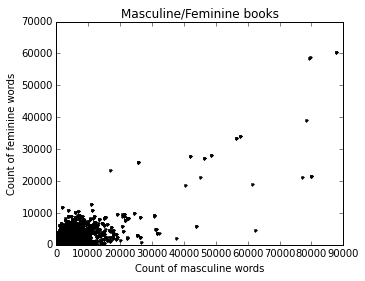

In [11]:
pylab.plot(d[:,0],d[:,1],'k.')
pylab.title("Masculine/Feminine books")
pylab.xlabel("Count of masculine words")
pylab.ylabel("Count of feminine words")
pylab.axes().set_aspect('equal')
pylab.show()

Action: copy this into a file on the cluster, test it on local files, and then once you're satisfied that it works, run this over all 50000 (or so) catalogue files on a copy of the catalogue that I have previously uploaded to the distributed filesystem.

In [ ]:
!ssh dsm1 'hadoop jar /usr/local/hadoop-2.6.0/share/hadoop/tools/lib/hadoop-streaming-2.6.0.jar \
  -D mapred.input.dir.recursive=true \
  -input /user/mas01cr/bda/2015-16/gutenberg/catalogue/cache/epub \
  -file catalog-old-rdf-mapper.py -mapper "python catalog-old-rdf-mapper.py" \
  -output gbcat'

In [ ]:
!ssh dsm1 'hadoop fs -copyToLocal gbcat/part-00000 catalog.dat'

Action: Copy this( himher-author-mapper.py) to the cluster, run the per-author MapReduce job, and visualise the result:

In [8]:
!ssh dsm1 'cat himher-author-mapper.py'
























print "%s\t%s\t%s" % (c[input][0], him, her)

In [ ]:
!ssh dsm1 'hadoop jar /usr/local/hadoop-2.6.0/share/hadoop/tools/lib/hadoop-streaming-2.6.0.jar \
  -D mapreduce.input.fileinputformat.input.dir.recursive=true \
  -input /user/mas01cr/bda/2015-16/gutenberg/data \
  -file himher-author-mapper.py -mapper "python himher-author-mapper.py" \
  -file himher-reducer.py -reducer "python himher-reducer.py" \
  -file catalog.dat \
  -output gbjoin2'

16/02/16 15:34:33 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [himher-author-mapper.py, himher-reducer.py, catalog.dat, /tmp/hadoop-unjar3088192367272562516/] [] /tmp/streamjob1879107503068921973.jar tmpDir=null
16/02/16 15:34:34 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/16 15:34:34 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/16 15:35:12 INFO mapred.FileInputFormat: Total input paths to process : 89026
16/02/16 15:35:14 INFO mapreduce.JobSubmitter: number of splits:89027
16/02/16 15:35:15 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1452790691884_0302
16/02/16 15:35:15 INFO impl.YarnClientImpl: Submitted application application_1452790691884_0302
16/02/16 15:35:15 INFO mapreduce.Job: The url to track the job: http://dsm1:8088/proxy/application_1452790691884_0302/
16/02/16 15:35:15 INFO mapreduce.Job: Running job: job_1452790

In [8]:
!ssh dsm1 'cat gbjoin2/part-00000 | head'

A-No. 1	1645	374
A. L. O. E.	6568	4338
A.L.O.C.	910	25
Aaberg, J. C. (Jens Christian)	1761	85
Aanrud, Hans	327	1097
Aaron, S. F. (Samuel Francis)	1934	153
Aaronsohn, Alexander	208	43
Abbey, Henry	385	373
Abbot, Francis Ellingwood	348	21
Abbot, Willis J. (Willis John)	6948	3120


In [9]:
!ssh dsm1 'hadoop fs -cat gbjoin2/part-00000 >' ./gbjoin2.tsv

In [79]:
import csv
import matplotlib.pyplot as plt
import pandas
from pandas import DataFrame
df = pandas.read_csv('gbjoin2.tsv', sep='\t',  names = ["Author", "Male", "Female"])
x= df['Male']
y= df['Female']

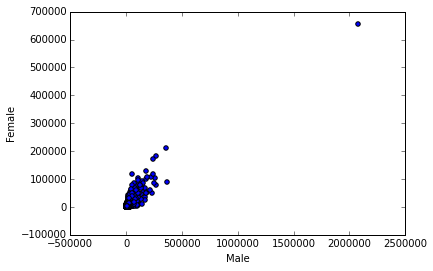

In [80]:
df.plot(x="Male", y="Female", kind='scatter')

In [81]:
df['Male'].argmax()
#this is the index of the data with most male subject counts

11342

In [82]:
df.iloc[[11342]]
#this is the author, which is 'Various', that is most sexist.

,Author,Male,Female
11342,Various,2078200,657188


In [83]:
df['Male'].argmin()# index of the least sexist author

477

In [76]:
df.iloc[[477]]# details of the least sexist author

,Author,Male,Female
477,"Bach, Johann Sebastian",0,0


In [30]:
!ssh dsm1 'cat getsize.py'
#the python file getsize.py is then executed to get the cataloguefilesize.dat

In [ ]:
!ssh dsm1 'python getsize.py'

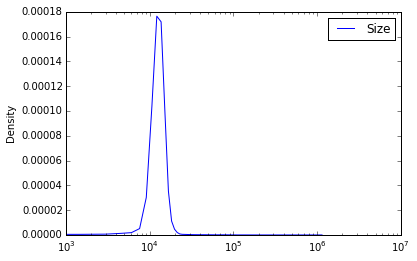

In [31]:
import pandas as pd
%matplotlib inline
df = pd.read_csv('./cataloguefilesize.dat', header=None, names=['Size'])
df.plot(kind='kde', logx=True)

In [45]:
max(df['Size']) # this is the maximum size of the catalogue file

764798

In [47]:
df['Size'].argmax() #this is the index number of the catalogue file with the maximum size.

42739

In [9]:
!ssh dsm1 'cat getguterndatasize.py'

In [2]:
!ssh dsm1 'python getguterndatasize.py'

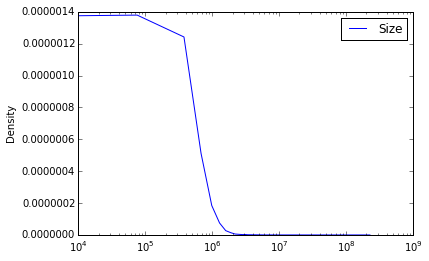

In [3]:
import pandas as pd
%matplotlib inline
df = pd.read_csv('./guternbergfilesize.dat', header=None, names=['Size'])
df[df.Size > 0].plot(kind='kde', logx=True)

In [4]:
max(df['Size'])

150526409

In [5]:
df['Size'].argmax() #this is 64251-th e-text

64251

In [1]:
!ssh dsm1 'ls /home/mas01cr/gutenberg/catalogue/cache/epub/1'

pg1.rdf


The following command was used to create a sequence file on hadoop on metadata for text 0-9:

find . -name '*.rdf' | xargs  python encode.py | \
hadoop jar /usr/local/hadoop-2.6.0/share/hadoop/tools/lib/hadoop-streaming-2.6.0.jar loadtb catalogue0-9.seq

In [1]:
!ssh dsm1 'cat encode.py'

In [2]:
!ssh dsm1 'cat typedbytes.py'

#! /usr/bin/env python

import sys, struct, os

def encode_string(string):
    if isinstance(string, bytearray):
        b = string
    elif isinstance(string, str):
        b = bytearray(string)
    elif isinstance(string, unicode):
        b = bytearray(string, 'utf-8')
    return bytearray(0) + b'\x07' + struct.pack('>i', len(b)) + b

def encode_file(path):
    size = os.path.getsize(path)
    fh = open(path, 'rb')
    contents = fh.read()
    fh.close()
    return encode_string(path) + encode_string(contents)

def read_typedbytes(fh, byte):
    if byte == 7:
        len, = struct.unpack('>i', fh.read(4))
        return fh.read(len)

def typedbytes(fh):
    while True:
        x = fh.read(1)
        if x == '':
            break
        key = read_typedbytes(fh, ord(x))
        x = fh.read(1)
        if x == '':
            break
        value = read_typedbytes(fh, ord(x))
        yield (key, value)


In [3]:
#the typedbyte-version of catalog-mapper python code 
!ssh dsm1 'cat catalog-old-rdflib-mapper-typedbytes.py'

#! /usr/bin/env python

## this is a workaround for Python 2 encoding issues
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

sys.path += ['.']

from rdflib import Graph
from rdflib.term import bind
from rdflib.namespace import Namespace, RDF

## need to do this explicitly in this version of RDFLib
DCTERMS = Namespace(u'http://purl.org/dc/terms/')
PGTERMS = Namespace(u'http://www.gutenberg.org/2009/pgterms/')

print >> sys.stderr, ":reporter:status:RDFLib Loaded"

from typedbytes import typedbytes, encode_string

print >> sys.stderr, ":reporter:status:typedbytes Loaded"

bind(DCTERMS.RFC4646, str)
for (key, value) in typedbytes(sys.stdin):

    g = Graph()
    g.parse(data=value)

    ## this is a hand-rolled implementation of the SPARQL query
    for x in g.triples((None, RDF['type'], PGTERMS['ebook'])):
        book = x[0]
        lang = [x for x in g.triples((book, DCTERMS['language'], None))]
        if not lang:
            continue
        lang = lang[0][2]
        languag

In [7]:
!ssh dsm1 'hadoop jar /usr/local/hadoop-2.6.0/share/hadoop/tools/lib/hadoop-streaming-2.6.0.jar \
 -io typedbytes \
 -inputformat org.apache.hadoop.mapred.SequenceFileInputFormat \
 -input catalogue0-9.seq \
 -file typedbytes.py \
 -file catalog-old-rdflib-mapper-typedbytes.py -mapper "python catalog-old-rdflib-mapper-typedbytes.py" \
 -output catalogue0-9'

16/02/17 11:29:59 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [typedbytes.py, catalog-old-rdflib-mapper-typedbytes.py, /tmp/hadoop-unjar3806054171673622118/] [] /tmp/streamjob6644205981191983053.jar tmpDir=null
16/02/17 11:30:00 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/17 11:30:00 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/17 11:30:01 INFO mapred.FileInputFormat: Total input paths to process : 1
16/02/17 11:30:01 INFO mapreduce.JobSubmitter: number of splits:2
16/02/17 11:30:01 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1452790691884_0327
16/02/17 11:30:01 INFO impl.YarnClientImpl: Submitted application application_1452790691884_0327
16/02/17 11:30:01 INFO mapreduce.Job: The url to track the job: http://dsm1:8088/proxy/application_1452790691884_0327/
16/02/17 11:30:01 INFO mapreduce.Job: Running job: job_1452790691884_03

In [8]:
!ssh dsm1 'hadoop fs -cat catalogue0-9/part-00000'

1	Jefferson, Thomas	en
2	United States	en
3	Kennedy, John F. (John Fitzgerald)	en
4	Lincoln, Abraham	en
5	United States	en
6	Henry, Patrick	en
8	Lincoln, Abraham	en
9	Lincoln, Abraham	en


Action: run the mapreduce job above on the small subset of the catalogue, and check that the output from the job is as expected. How many mappers are used in the job?

Answer: 2 mappers are used.

Action: construct the sequence file for the whole of the metadata catalogue, and run the MapReduce job above on it. How long does it take? If you increase the number of mappers from the default.

#Command used to enconde the entire metadata catalogue:

find /home/mas01cr/gutenberg/catalogue/cache/epub -name '*.rdf' | xargs python encode.py | hadoop jar /usr/local/hadoop-2.6.0/share/hadoop/tools/lib/hadoop-streaming-2.6.0.jar loadtb catalogue.seq

#Command used to perform the mapreduce job without increasing the number of map tasks:

hadoop jar /usr/local/hadoop-2.6.0/share/hadoop/tools/lib/hadoop-streaming-2.6.0.jar \
 
 -io typedbytes \
 
 -inputformat org.apache.hadoop.mapred.SequenceFileInputFormat \
 
 -input catalogue.seq \
 
 -file typedbytes.py \
 
 -file catalog-old-rdflib-mapper-typedbytes.py -mapper "python catalog-old-rdflib-mapper-typedbytes.py" \
 
 -output catalogue


#Command used to perform the mapreduce job by increasing the number of map tasks:

hadoop jar /usr/local/hadoop-2.6.0/share/hadoop/tools/lib/hadoop-streaming-2.6.0.jar \

 -D mapred.map.tasks=20 \
 
 -io typedbytes \
 
 -inputformat org.apache.hadoop.mapred.SequenceFileInputFormat \
 
 -input catalogue.seq \
 
 -file typedbytes.py \
 
 -file catalog-old-rdflib-mapper-typedbytes.py -mapper "python catalog-old-rdflib-mapper-typedbytes.py" \
 
 -output catalogue1
 
 
Observation: 
 
Without increasing the map tasks in the mapreduce process, it took around 2 minutes to complete. It took only 1 minute to complete the task by increasing the number of map tasks to 20.






In [11]:
!ssh dsm1 'hadoop fs -cat catalogue1/part-00000 | tail'

50952	Zeigler, Wilbur G.	en
50955	Cannon, Elizabeth Rachel	en
50956	Shumsky-Solomonov, C. M.	en
50961	Seaman, Augusta Huiell	en
50964	James, G. P. R. (George Payne Rainsford)	en
50965	Andersen, H. C. (Hans Christian)	de
50966	Schopenhauer, Arthur	en
50971	Hoskins, Robert P.	en
50973	Archer, Thomas	en
50979	Kleist, Heinrich von	de


In [ ]:
now the entire e-text directory needs to be transformed into typed-bytes and will be save in a folder on hadoop called etext.seq

Command used:
    
find /home/mas01cr/gutenberg/data -name '*.txt' | xargs python encode.py \
| hadoop jar /usr/local/hadoop-2.6.0/share/hadoop/tools/lib/hadoop-streaming-2.6.0.jar loadtb etext.seq

In [4]:
#The himher-author-typedbytes-mapper.py used:
!ssh dsm1 'cat himher-author-typedbytes-mapper.py'

#! /usr/bin/env python

import sys, os, re, codecs
sys.path += ['.']
from typedbytes import encode_string, typedbytes

sys.stdout = codecs.getwriter('utf-8')(sys.stdout)

c = {}; catalog = codecs.open('catalog.dat','r','utf8')
for line in catalog:
    x = line.strip().split("\t")
    c[x[0]] = (x[1], x[2])

for (key, value) in typedbytes(sys.stdin):
    okey = key.split("/")[-1].split(".")[0]
    print >> sys.stderr, "%s" % okey
    if not c.get(okey):
        continue
    if c[okey][1] != "en":
        continue
    him = len(re.findall(r'\b(he|him|himself|his)\b', value))
    her = len(re.findall(r'\b(she|her|herself|hers)\b', value))

    ovalue = "%s\t%s" % (him, her)
    ostring = "%s%s" % (encode_string(c[okey][0]), encode_string(ovalue))
    os.write(1, ostring)


In [5]:
#The himher-typedbytes-reducer.py used:
!ssh dsm1 'cat himher-typedbytes-reducer.py'


#! /usr/bin/env python

import sys
reload(sys)
sys.setdefaultencoding('utf-8')

sys.path += ['.']
from typedbytes import typedbytes, encode_string

current_key = None; current_him = 0; current_her = 0; key = ''

for key, value in typedbytes(sys.stdin):
    him, her = value.split("\t")
    him = int(him); her = int(her)
    if key == current_key:
        current_him += him
        current_her += her
    else:
        if current_key:
            ovalue = "%s\t%s" % (current_him, current_her)
            sys.stdout.write("%s%s" % (encode_string(current_key), encode_string(ovalue)))
            sys.stdout.flush()
        current_key = key
        current_him = him
        current_her = her

if key == current_key:
    ovalue = "%s\t%s" % (current_him, current_her)
    sys.stdout.write("%s%s" % (encode_string(current_key), encode_string(ovalue)))
    sys.stdout.flush()


In [12]:
!ssh dsm1 'hadoop jar /usr/local/hadoop-2.6.0/share/hadoop/tools/lib/hadoop-streaming-2.6.0.jar \
  -D mapred.map.tasks=20 \
  -D mapred.child.java.opts=-Xmx1024M \
  -io typedbytes \
  -inputformat org.apache.hadoop.mapred.SequenceFileInputFormat \
  -input etext.seq \
  -file himher-author-typedbytes-mapper.py -mapper "python himher-author-typedbytes-mapper.py" \
  -file himher-typedbytes-reducer.py -reducer "python himher-typedbytes-reducer.py" \
  -file catalog.dat \
  -file typedbytes.py \
  -output authorTBhimher1'

16/02/17 13:06:11 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [himher-author-typedbytes-mapper.py, himher-typedbytes-reducer.py, catalog.dat, typedbytes.py, /tmp/hadoop-unjar5489735924000134033/] [] /tmp/streamjob8133522848240817018.jar tmpDir=null
16/02/17 13:06:12 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/17 13:06:12 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/17 13:06:13 INFO mapred.FileInputFormat: Total input paths to process : 1
16/02/17 13:06:13 INFO mapreduce.JobSubmitter: number of splits:20
16/02/17 13:06:13 INFO Configuration.deprecation: mapred.map.tasks is deprecated. Instead, use mapreduce.job.maps
16/02/17 13:06:13 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1452790691884_0332
16/02/17 13:06:13 INFO impl.YarnClientImpl: Submitted application application_1452790691884_0332
16/02/17 13:06:13 INFO mapreduce.Job:

Note: For a himher-author mapreduce job that took a few hours to complete previously(i.e, without coding the files into typedbytes format), now it only takes 20 secs to complete.

Shown below the inspection of the result of the mapreduce job that was just performed:

In [13]:
!ssh dsm1 'hadoop fs -cat authorTBhimher1/part-00000 | tail'

Waring, George E. (George Edwin)	1165	276
Harris, Maurice H. (Maurice Henry)	1441	103
L'Epine, Ernest Louis Victor Jules	1941	565
Brereton, F. S. (Frederick Sadleir)	7481	436
Chateaubriand, François Auguste de	316	251
Westerman, Percy F. (Percy Francis)	928	30
Knatchbull-Hugessen, Edward Hugessen	1811	715
Pitt-Rivers, Augustus Henry Lane-Fox	75	7
Sieveking, I. Giberne (Isabel Giberne)	175	97
Kennedy, The President's Commission on the Assassination of President	71470	17533
